In [9]:
import torch
from torchvision.datasets import WIDERFace
import matplotlib.image as imga
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np
import torchvision.transforms as T
from PIL import Image
from datasets import load_dataset
import random

In [10]:
dataset = load_dataset("CUHK-CSE/wider_face")

# Convert to PyTorch format
train_dataset = dataset['train'].with_format("torch")
val_dataset = dataset['validation'].with_format("torch")


README.md: 0.00B [00:00, ?B/s]

wider_face.py: 0.00B [00:00, ?B/s]

WIDER_train.zip:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

WIDER_val.zip:   0%|          | 0.00/363M [00:00<?, ?B/s]

WIDER_test.zip:   0%|          | 0.00/1.84G [00:00<?, ?B/s]

wider_face_split.zip:   0%|          | 0.00/3.59M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/12880 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/16097 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3226 [00:00<?, ? examples/s]

In [16]:
train_dataset[5]['faces']['bbox']

tensor([[ 134.,  580.,   12.,   14.],
        [  55.,  581.,    5.,   10.],
        [ 108.,  551.,   14.,   25.],
        [ 135.,  540.,    5.,    7.],
        [1005.,  554.,   15.,   22.],
        [ 989.,  592.,   16.,   21.],
        [ 961.,  555.,   13.,   19.],
        [ 946.,  568.,   15.,   21.],
        [ 922.,  555.,   15.,   19.],
        [ 900.,  583.,   12.,   17.],
        [ 897.,  569.,   12.,   13.],
        [ 829.,  581.,   15.,   21.],
        [ 812.,  575.,   12.,   19.],
        [ 824.,  564.,    9.,   13.],
        [ 855.,  578.,   10.,   13.],
        [ 985.,  663.,   15.,   21.],
        [ 587.,  574.,    7.,   12.],
        [ 333.,  386.,   11.,   16.]])

In [2]:
dataset = WIDERFace(root="path/to/data", split="train", download=True)
val_data= WIDERFace(root="path/to/data", split="val", download=True)

Files already downloaded and verified
Files already downloaded and verified


In [2]:
test_data= WIDERFace(root="path/to/data", split="test", download=True)


Files already downloaded and verified


In [6]:
type(dataset)

torchvision.datasets.widerface.WIDERFace

In [4]:
val_data= WIDERFace(root="path/to/dat", split="val", download=True)


FileURLRetrievalError: Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=15hGDLhsx8bLgLcIRD5DhYt5iBxnjNF1M

but Gdown can't. Please check connections and permissions.

In [301]:
print("valdata: "+str(len(val_data)))
print("data_train: "+str(len(dataset)))


valdata: 3226
data_train: 12880


In [319]:

transforms = T.Compose([
    T.Resize((640, 640)),
    T.ToTensor(),
])

dataset2 = WIDERFace(root='path/to/data', transform=transforms)
val_data2 = WIDERFace(root='path/to/data', transform=transforms, split='val')

In [320]:
transforms = T.Compose([
    T.ToTensor(),
])
dataset3 = WIDERFace(root='path/to/data', transform=transforms,)
val_data3 = WIDERFace(root='path/to/data', transform=transforms,split='val')

In [323]:
def correct_labels(arr2,arr3):
   for i in range (0,len(arr2)):
      arr2[i][1]["bbox"][:,0]=(arr2[i][1]["bbox"][:,0]*(640/1024))
      arr2[i][1]["bbox"][:,1]=(arr2[i][1]["bbox"][:,1]*(640/arr3[i][0].numpy().shape[1]))
      arr2[i][1]["bbox"][:,2]=(arr2[i][1]["bbox"][:,2]*(640/1024))
      arr2[i][1]["bbox"][:,3]=(arr2[i][1]["bbox"][:,3]*(640/arr3[i][0].numpy().shape[1]))
      
      if(i==len(arr2)/2):
         print("done half!")
   print("done!!")
   return arr2

In [324]:
dataset4  = correct_labels(dataset2,dataset3)
val_data4 = correct_labels(val_data2,val_data3)

done half!
done!!
done half!
done!!


In [11]:
dataset[5][1]

{'bbox': tensor([[ 134,  580,   12,   14],
         [  55,  581,    5,   10],
         [ 108,  551,   14,   25],
         [ 135,  540,    5,    7],
         [1005,  554,   15,   22],
         [ 989,  592,   16,   21],
         [ 961,  555,   13,   19],
         [ 946,  568,   15,   21],
         [ 922,  555,   15,   19],
         [ 900,  583,   12,   17],
         [ 897,  569,   12,   13],
         [ 829,  581,   15,   21],
         [ 812,  575,   12,   19],
         [ 824,  564,    9,   13],
         [ 855,  578,   10,   13],
         [ 985,  663,   15,   21],
         [ 587,  574,    7,   12],
         [ 333,  386,   11,   16]]),
 'blur': tensor([2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 'expression': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'illumination': tensor([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 'occlusion': tensor([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'pose': tensor([1, 2, 1, 0, 0, 0, 2, 1, 0, 2, 0,

In [17]:
dataset2[5][1]

NameError: name 'dataset2' is not defined

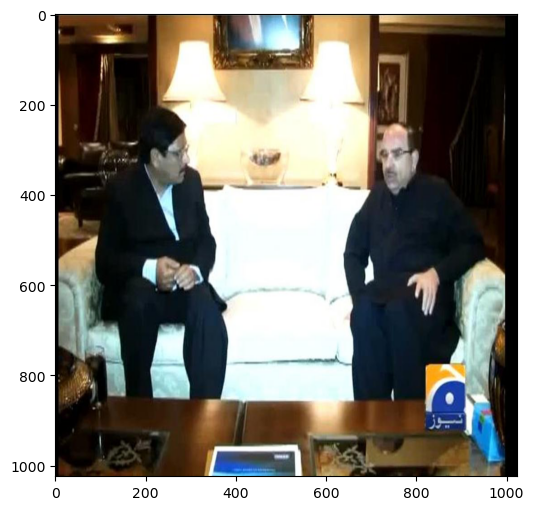

In [80]:
p=random.randint(0,12000)
plt.figure(figsize=(6, 6))
img=dataset2[2000][0]
plt.imshow(img.numpy().transpose(1,2,0))

In [326]:
torch.save(dataset4,"/Users/vipulagarwal/Documents/AI & ML/Projects/New_FR/version2/Faces/path/to/data/widerface/dataset640.pt")
torch.save(val_data4,"/Users/vipulagarwal/Documents/AI & ML/Projects/New_FR/version2/Faces/path/to/data/widerface/val_data640.pt")


In [317]:
dataset2=torch.load("/Users/vipulagarwal/Documents/AI & ML/Projects/New_FR/version2/Faces/path/to/data/widerface/dataset2424.pt")
val_data2=torch.load("/Users/vipulagarwal/Documents/AI & ML/Projects/New_FR/version2/Faces/path/to/data/widerface/val_data2424.pt")


/var/folders/pc/3dvbqf1x7ts37h_0ccg5yh5r0000gn/T/ipykernel_3778/3887341332.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset2=torch.load("/Users/vipulagarwal/Docum

In [5]:
dataset4=torch.load("/Users/vipulagarwal/Documents/AI & ML/Projects/New_FR/version2/Faces/path/to/data/widerface/dataset640.pt")
val_data4=torch.load("/Users/vipulagarwal/Documents/AI & ML/Projects/New_FR/version2/Faces/path/to/data/widerface/val_data640.pt")


/var/folders/pc/3dvbqf1x7ts37h_0ccg5yh5r0000gn/T/ipykernel_1762/921145795.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset4=torch.load("/Users/vipulagarwal/Docume

In [6]:
dataset2[2000][1]

{'bbox': tensor([[142, 146,  43,  95],
         [453, 153,  37,  94]]),
 'blur': tensor([1, 1]),
 'expression': tensor([0, 0]),
 'illumination': tensor([0, 0]),
 'occlusion': tensor([0, 0]),
 'pose': tensor([0, 0]),
 'invalid': tensor([0, 0])}

In [7]:
dataset4[2000][1]

{'bbox': tensor([[142, 146,  43,  95],
         [453, 153,  37,  94]]),
 'blur': tensor([1, 1]),
 'expression': tensor([0, 0]),
 'illumination': tensor([0, 0]),
 'occlusion': tensor([0, 0]),
 'pose': tensor([0, 0]),
 'invalid': tensor([0, 0])}

In [8]:
dataset2[2000][1]


{'bbox': tensor([[142, 146,  43,  95],
         [453, 153,  37,  94]]),
 'blur': tensor([1, 1]),
 'expression': tensor([0, 0]),
 'illumination': tensor([0, 0]),
 'occlusion': tensor([0, 0]),
 'pose': tensor([0, 0]),
 'invalid': tensor([0, 0])}

In [9]:
# p=2939
def org(p):
    coords = dataset4[p][1]["bbox"].numpy()
    fig, ax = plt.subplots()

    img=dataset4[p][0].numpy().transpose(1,2,0)
    ax.imshow(img)
    for i in range (0,coords.shape[0]):
        patch = patches.Rectangle((coords[i,0],coords[i,1]),coords[i,2],coords[i,3],linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(patch)

        
    plt.show()

In [10]:
# p=random.randint(0,12000)
def trans(p):
    coords = dataset2[p][1]["bbox"].numpy()*(640/1024)
    fig, ax = plt.subplots()

    img=dataset2[p][0].numpy().transpose(1,2,0)
    img_uint8 = (img * 255).astype(np.uint8)
    img_pil = Image.fromarray(img_uint8)
    img_resized = img_pil.resize((640, 640), Image.BILINEAR)
    img = np.array(img_resized)
    ax.imshow(img)
    for i in range (0,coords.shape[0]):
        patch = patches.Rectangle((coords[i,0],coords[i,1]),coords[i,2],coords[i,3],linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(patch)

        
    plt.show()

In [11]:
def wo(p):
    img=dataset2[p][0].numpy().transpose(1,2,0)
    img_uint8 = (img * 255).astype(np.uint8)
    img_pil = Image.fromarray(img_uint8)
    img_resized = img_pil.resize((640, 640), Image.BILINEAR)
    img = np.array(img_resized)
    plt.imshow(img)

In [12]:
def orgv(p):
    coords = val_data4[p][1]["bbox"].numpy()
    fig, ax = plt.subplots()

    img=val_data4[p][0].numpy().transpose(1,2,0)
    ax.imshow(img)
    for i in range (0,coords.shape[0]):
        patch = patches.Rectangle((coords[i,0],coords[i,1]),coords[i,2],coords[i,3],linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(patch)

        
    plt.show()

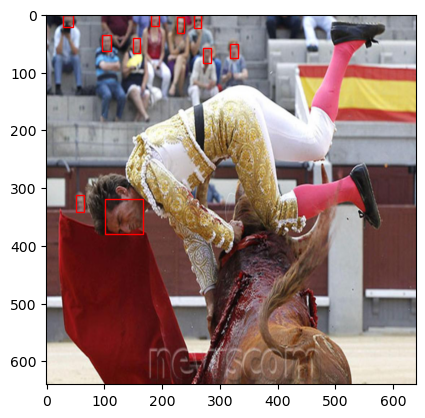

In [103]:
# p=random.randint(0,3100)
p=9504
org(p)
# orgv(p)
# trans(p)
# wo(p)

In [72]:
p

2476

In [ ]:
def correct_labels(arr,n):
   for i in range (0,len(arr)):
      arr[i][1]["bbox"]=arr[i][1]["bbox"]*(n/1024) 
   print("done")
   return arr